**Week 3:**
# Dynamic Programming
Methods that use DP to find the optimal policy:
- Value iteration
- Policy iteration

# Frozen Lake Problem
## Part I: Policy Iteration

In [1]:
import gym
import numpy as np

In [2]:
env = gym.make('FrozenLake-v0')
# env = gym.make('FrozenLake-v0', is_slippery=False)

In [3]:
print("gym", gym.__version__)
print("numpy", np.__version__)

gym 0.18.0
numpy 1.22.4


In [4]:
env.render()


SFFF
FHFH
FFFH
HFFG


### Policy Evaluation
<img src="sut_4_1_polEval.png" alt="Policy Evaluation"/>

In [5]:
def compute_value_function(policy, gamma=1.0):
    
    # initialize value table with zeros
    value_table = np.zeros(env.nS)
    
    # set the threshold
    threshold = 1e-2
    
    while True:
        
        # copy the value table to the updated_value_table
        updated_value_table = np.copy(value_table)

        # for each state in the environment, select the action according to the policy and compute the value table
        for state in range(env.nS):
            action = policy[state]
            
            # build the value table with the selected action
            value_table[state] = sum([trans_prob * (reward_prob + gamma * updated_value_table[next_state]) 
                        for trans_prob, next_state, reward_prob, _ in env.P[state][action]])
            
        if (np.sum((np.fabs(updated_value_table - value_table))) <= threshold):
            break
            
    return value_table

**RECAP: Transition probability**
`env.P[state][action]`

In [20]:
print(env.P[9][2])

[(0.3333333333333333, 13, 0.0, False), (0.3333333333333333, 10, 0.0, False), (0.3333333333333333, 5, 0.0, True)]


> **TODO:** Modify the above function, considering a probabolistic policy <br>

In [6]:
# (for the above TODO)
random_policy = np.ones([env.nS, env.nA]) / env.nA
print(random_policy)

[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]


In [19]:
# (for the above TODO)
policy_rand = np.zeros(env.nS)
for i in range(env.nS):
    policy_rand[i] = np.random.choice(env.nA)

print(policy_rand)

[1. 3. 3. 0. 0. 2. 3. 1. 1. 0. 3. 2. 1. 3. 3. 1.]


In [21]:
# (for the above TODO)
def policy_eval(policy, gamma=1.0, theta=1e-5):
    # Start with a random (all 0) value function
    V = np.zeros(env.nS)
    while True:
        delta = 0
        # For each state, perform a "full backup"
        for s in range(env.nS):
            v = 0
            # Look at the possible next actions
            for a, action_prob in enumerate(policy[s]):
                # For each action, look at the possible next states...
                for  prob, next_state, reward, done in env.P[s][a]:
                    # Calculate the expected value. Ref: Sutton book eq. 4.6.
                    v += action_prob * prob * (reward + gamma * V[next_state])
            # How much our value function changed (across any states)
            delta = max(delta, np.abs(v - V[s]))
            V[s] = v
        # Stop evaluating once our value function change is below a threshold
        if delta < theta:
            break
    return np.array(V)

val = policy_eval(random_policy, gamma=1.0)
print(val.reshape(4,4))

[[0.013911   0.01161424 0.02094062 0.01046758]
 [0.01623478 0.         0.04074774 0.        ]
 [0.03479961 0.08816698 0.14205099 0.        ]
 [0.         0.17581855 0.4392897  0.        ]]


In [7]:
def extract_policy(value_table, gamma = 1.0):
 
    # Initialize the policy with zeros
    policy = np.zeros(env.observation_space.n) 
    
    
    for state in range(env.observation_space.n):
        
        # initialize the Q table for a state
        Q_table = np.zeros(env.action_space.n)
        
        # compute Q value for all ations in the state
        for action in range(env.action_space.n):
            for next_sr in env.P[state][action]: 
                trans_prob, next_state, reward_prob, _ = next_sr 
                Q_table[action] += (trans_prob * (reward_prob + gamma * value_table[next_state]))
        
        # Select the action which has maximum Q value as an optimal action of the state
        policy[state] = np.argmax(Q_table)
    
    return policy

## Policy Iteration
<img src="sut_4_3_polIter.png" alt="Policy Iteration"/>

In [8]:
def policy_iteration(env,gamma = 1.0):
    
    # Initialize policy with zeros
    old_policy = np.zeros(env.observation_space.n)   
    no_of_iterations = 200000
    
    for i in range(no_of_iterations):
        
        # compute the value function
        new_value_function = compute_value_function(old_policy, gamma)
        
        # Extract new policy from the computed value function
        new_policy = extract_policy(new_value_function, gamma)
   
        # Then we check whether we have reached convergence i.e whether we found the optimal
        # policy by comparing old_policy and new policy if it same we will break the iteration
        # else we update old_policy with new_policy

        if (np.all(old_policy == new_policy)):
            print ('Policy-Iteration converged at step %d.' %(i+1))
            break
        old_policy = new_policy
        
    return new_policy

In [9]:
print (policy_iteration(env))

Policy-Iteration converged at step 7.
[0. 3. 3. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


# Your Turn (`TODO`)
> **TODO:** Modify the above codes to plot the history of value functions and their corresponding policies

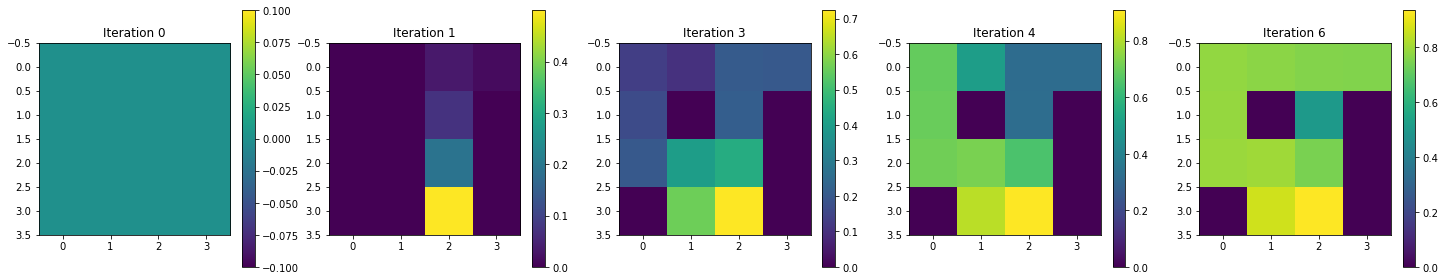

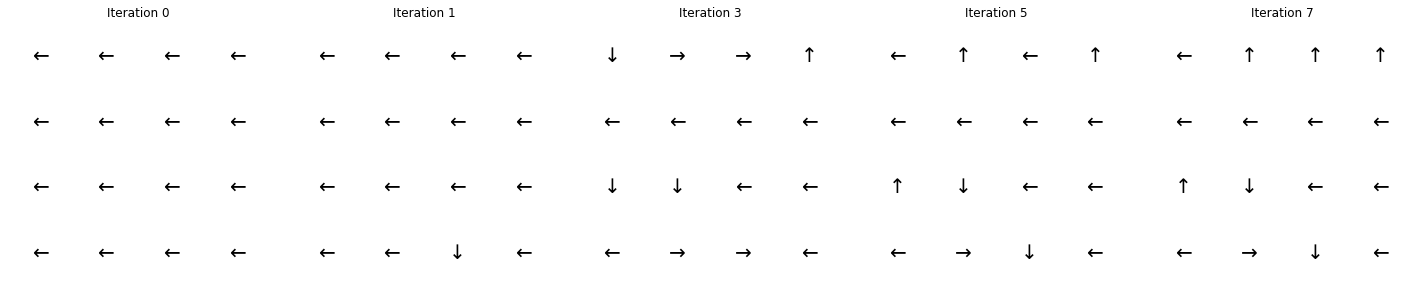

In [10]:
import matplotlib.pyplot as plt

## TODO ...

> **TODO:** Improve the above result by multiple arrows.

## Part II: Value Iteration
<img src="sut_4_4_valIter.png" alt="Value Iteration"/>

In [11]:
def value_iteration(env, gamma = 1.0):
    
    # initialize value table with zeros
    value_table = np.zeros(env.observation_space.n)
    
    # set number of iterations and threshold
    no_of_iterations = 100000
    threshold = 1e-2
    
    for i in range(no_of_iterations):
        
        # On each iteration, copy the value table to the updated_value_table
        updated_value_table = np.copy(value_table) 
        
        # Now we calculate Q Value for each actions in the state 
        # and update the value of a state with maximum Q value
        
        for state in range(env.observation_space.n):
            Q_value = []
            for action in range(env.action_space.n):
                next_states_rewards = []
                for next_sr in env.P[state][action]: 
                    trans_prob, next_state, reward_prob, _ = next_sr 
                    next_states_rewards.append((trans_prob * (reward_prob + gamma * updated_value_table[next_state]))) 
                
                Q_value.append(np.sum(next_states_rewards))
                
            value_table[state] = max(Q_value) 
            
        # we will check whether we have reached the convergence i.e whether the difference 
        # between our value table and updated value table is very small. But how do we know it is very
        # small? We set some threshold and then we will see if the difference is less
        # than our threshold, if it is less, we break the loop and return the value function as optimal
        # value function
        
        if (np.sum(np.fabs(updated_value_table - value_table)) <= threshold):
             print ('Value-iteration converged at iteration #%d.' %(i+1))
             break
    
    return value_table

In [12]:
optimal_value_function = value_iteration(env=env,gamma=1.0)

Value-iteration converged at iteration #127.


In [13]:
optimal_policy = extract_policy(optimal_value_function, gamma=1.0)

|Number|Action|
|-|-|
|0|Left|
|1|Down|
|2|Right|
|3|Up|

In [14]:
env.render()
print(optimal_policy)


SFFF
FHFH
FFFH
HFFG
[0. 3. 3. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


# Your Turn (`TODO`)
> **TODO:** Modify the above codes to plot the history of value functions and their corresponding policies

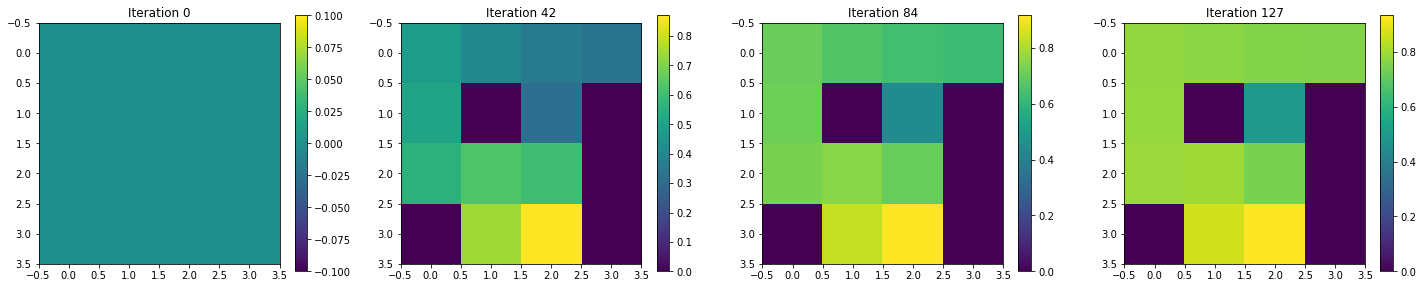

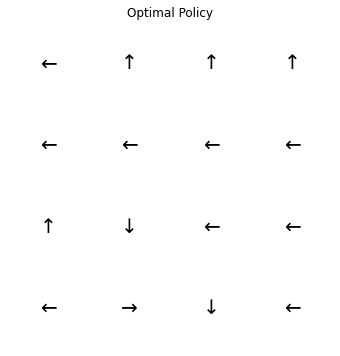

In [15]:
# TODO

> **TODO:** Improve the above result by multiple arrows, annotated value function, etc.